In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns 
import geopandas as gpd
import folium
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt

/home/student.unimelb.edu.au/xinyij4/.local/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data_all = pd.read_csv("Iowa_Liquor_Sales.csv")
data_all.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [3]:
print("The entire dataset dimension: ",data_all.shape) # (12591077, 24)
print("Attributes:",data_all.columns) # (12591077, 24)

The entire dataset dimension:  (12591077, 24)
Attributes: Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')


In [4]:
# check missing values 
print("Missing values:\n",data_all.isnull().sum()) 

Missing values:
 Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64


In [5]:
# drop records with missing values 
data_all = data_all.dropna()

In [6]:
print("##################\n",data_all.groupby("City").size()) # 790 cities
print("##################\n",data_all.groupby("County").size()) # 200 cities
print("##################\n",data_all.groupby("Item Number").size())# 7263 brands

##################
 City
ACKLEY       2722
ADAIR        1567
ADEL        10878
AFTON         994
AKRON        2094
            ...  
Winthrop      994
Woodbine     2770
Woodward      605
ZWINGLE      1260
Zwingle       455
Length: 790, dtype: int64
##################
 County
ADAIR           2503
ADAMS           2066
ALLAMAKEE      11260
APPANOOSE      10076
AUDUBON         2143
               ...  
Winnebago      33984
Winneshiek     55567
Woodbury      287930
Worth          12643
Wright         27719
Length: 200, dtype: int64
##################
 Item Number
101       31
102       31
104       10
107       31
108       39
          ..
996026     3
997085     1
997086     3
997878     3
999275     1
Length: 7263, dtype: int64


In [7]:
#top_three_category = l.iloc[:3, 0].to_list()
#data = data_all.loc[data_all["Category"].isin(top_three_category),:]
data = data_all
data.Category.value_counts()
print(data.shape)#(12495974, 24)

(12495974, 24)


### Pre-processing 

In [8]:
#pd.set_option('display.max_rows', 10)
data["County"] = data["County"].str.title()
data["City"] = data["City"].str.title()
county_countN_df = data.loc[:,["County","County Number","Date"]].groupby(["County","County Number"]).count().reset_index()
print("Counties with the same county number but conflicting names")
county_countN_df["County Number"].value_counts()
print(county_countN_df.loc[county_countN_df["County Number"].isin([71.0, 78.0,17.0, 11.0]),:])

data.County = data.County.replace(["Buena Vist","Cerro Gord",
                                   "Obrien","Pottawatta"], ["Buena Vista","Cerro Gordo",
                                                            "O'brien","Pottawattamie"])


Counties with the same county number but conflicting names
           County  County Number    Date
10     Buena Vist           11.0   24411
11    Buena Vista           11.0   95755
17     Cerro Gord           17.0   60573
18    Cerro Gordo           17.0  228400
72        O'Brien           71.0   63180
73         Obrien           71.0   19773
80     Pottawatta           78.0   90774
81  Pottawattamie           78.0  325135


In [9]:
# convert data types 
data["Date"]  = pd.to_datetime(data['Date'],format='%m/%d/%Y')
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day
data["week_of_day"] = data["Date"].dt.dayofweek+1
data["week_of_day"] = data["week_of_day"].astype("category")
data.loc[:,"Sale (Dollars)"] = data.loc[:, "Sale (Dollars)"].str[1:]
data.loc[:,"State Bottle Cost"] = data.loc[:, "State Bottle Cost"].str[1:]
data.loc[:,"State Bottle Retail"] = data.loc[:, "State Bottle Retail"].str[1:]
data["Store Number"] = data["Store Number"].astype("category")
data["County Number"] = data["County Number"].astype("int")
data["County Number"] = data["County Number"].astype("category")
data["Category"] = data["Category"].astype("int")
data["Category"] = data["Category"].astype("category")
data["County"] = data["County"].astype("category")
data["City"] = data["City"].astype("category")
data["Sale (Dollars)"] = data["Sale (Dollars)"].astype("float")
data["State Bottle Cost"] = data["State Bottle Cost"].astype("float")
data["State Bottle Retail"] = data["State Bottle Retail"].astype("float")

In [10]:
# remove potential errors 
cond1 = data["Bottle Volume (ml)"] == 0
cond2 = data["State Bottle Cost"] == 0
cond3 = data["State Bottle Retail"] == 0
cond4 = data["Sale (Dollars)"] == 0
cond5 = data["Bottles Sold"] ==0
cond6 = data["Volume Sold (Liters)"] ==0
data = data.loc[~(cond1|cond2|cond3|cond4|cond5|cond6),:] # 5039 rows removed
# = (12490935, 27)

In [11]:
data["latitude"]  = [re.findall(r"\((.+?),",i) for i in data["Store Location"]]
data["longitude"]  = [re.findall(r", (.+?)\)",i) for i in data["Store Location"]]
# 2981046 (about 600 records with missing coordinates)
filtered_coord = [len(data.iloc[i, 28]) != 0 for i in range(data.shape[0])]
filtered_coord
data_filtered = data.loc[filtered_coord, :]
data_filtered.latitude = data_filtered.latitude.map(lambda x:x[0])
data_filtered.longitude = data_filtered.longitude.map(lambda x:x[0])
data_filtered.latitude = data_filtered.latitude.astype("float")
data_filtered.longitude = data_filtered.longitude.astype("float")

In [12]:
print(data_filtered.shape)
print(data.shape)

(11559658, 30)
(12490935, 30)


In [13]:
data_filtered.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'year', 'month', 'day', 'week_of_day', 'latitude', 'longitude'],
      dtype='object')

In [14]:
from collections import Counter
num_store_per_county = data_filtered[['Store Number','County Number',"Invoice/Item Number"]].groupby(["County Number","Store Number"])
z = list(num_store_per_county.groups.keys())
store_num_counter = Counter(elem[0] for elem in z)
df_store = pd.DataFrame.from_dict(store_num_counter, orient = "index").reset_index()
df_store.columns = ["County Number","store_num"]
df_store

,County Number,store_num
0,1,11
1,2,1
2,3,8
3,4,7
4,5,4
...,...,...
94,95,8
95,96,11
96,97,49
97,98,6


In [15]:
#num_records_per_county = data_filtered[['Store Number','County Number',"Invoice/Item Number"]].groupby("County Number").count().reset_index()
#num_store_per_county.rename(columns={"Store Number":""}, inplace = True)
#num_store_per_county

data_filtered = pd.merge(data_filtered, df_store, how = "left", on = ['County Number'])
data_filtered.shape#(11559658, 31)

(11559658, 31)

In [16]:
data_filtered = data_filtered[['year', 'month', 'day', 'latitude', 'longitude', 
                            'week_of_day','Pack','City', 'Category','County Number','store_num',
                            'Item Number','Bottle Volume (ml)','State Bottle Cost', 
                            'State Bottle Retail','Volume Sold (Liters)','Store Number']]
data_filtered.rename(columns = {"County Number":"county_number", 
                             "Volume Sold (Liters)":"volume_sold",
                             "Pack":"pack",
                             "City":"city","Category":"category",
                             "Store Number":"store_number",
                             "State Bottle Retail":"retail_price",
                             "State Bottle Cost":"cost_price",
                             "County Number":"county_number",
                             "Item Number":"item_number",
                             "Bottle Volume (ml)":"bottle_volume"}, inplace = True)


In [17]:
data_filtered[["latitude","longitude"]].describe()

,latitude,longitude
count,1.155966e+07,1.155966e+07
mean,4.195041e+01,-9.301794e+01
std,6.687190e-01,1.646425e+00
min,3.009843e+01,-1.000012e+02
25%,4.156122e+01,-9.379381e+01
50%,4.175267e+01,-9.320245e+01
75%,4.248504e+01,-9.163265e+01
max,4.534882e+01,-7.098997e+01


In [18]:
data_filtered.columns

Index(['year', 'month', 'day', 'latitude', 'longitude', 'week_of_day', 'pack',
       'city', 'category', 'county_number', 'store_num', 'item_number',
       'bottle_volume', 'cost_price', 'retail_price', 'volume_sold',
       'store_number'],
      dtype='object')

In [19]:
def drop_3IQR_val(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
    df_new = df.drop(df[(df[col_name] > q3 + 3*IQR) | (df[col_name] < q1 - 3*IQR)].index)
    print(df.shape[0]- df_new.shape[0],"records removed",df_new.shape[0],"records remaning" )
    return (df_new)

targeted_features = ["volume_sold","cost_price","retail_price","pack"]
for i in targeted_features:
    data_filtered= drop_3IQR_val(data_filtered, i)


250632 records removed 11309026 records remaning
132489 records removed 11176537 records remaning
67143 records removed 11109394 records remaning
285614 records removed 10823780 records remaning


In [20]:
data_filtered = data_filtered.loc[(data_filtered['latitude'] > 40.396764305572) & (data_filtered['latitude'] < 43.580390855608) & 
            (data_filtered['longitude'] < -90.087890625) & (data_filtered['longitude'] > -96.767578125)]

#-96.767578125 40.396764305572, -96.767578125 43.580390855608, -90.087890625 43.580390855608, -90.087890625 40.396764305572 
#https://geodata.iowa.gov/dataset/boundary-state-iowa
#original = (10823780, 17), after removing = (10816271, 17)


In [21]:
data_filtered.shape#(10816271, 17)

(10816271, 17)

In [22]:
data_final = data_filtered.sample(n = 1000000, replace = False, random_state = 100)

In [21]:
#data_final.describe()
#data_final["log_volume_sold"] = np.log(data_final["volume_sold"])
#data_final["log_cost_price"] = np.log(data_final["cost_price"])
#data_final["log_store_num"] = np.log(data_final["store_num"])
#data_final["log_retail_price"] = np.log(data_final["retail_price"])
#data_final["log_bottle_volume"] = np.log(data_final["bottle_volume"])

In [24]:
data_final.dtypes

year                int64
month               int64
day                 int64
latitude          float64
longitude         float64
week_of_day      category
pack                int64
city             category
category         category
county_number       int64
store_num           int64
item_number         int64
bottle_volume       int64
cost_price        float64
retail_price      float64
volume_sold       float64
store_number     category
encoded_city     category
dtype: object

In [23]:
from sklearn import preprocessing
# covert string representation of city to interger representation
encoder = preprocessing.LabelEncoder().fit(data_final.city)
data_final["encoded_city"] = encoder.transform(data_final.city)
data_final["encoded_city"] = data_final["encoded_city"].astype("category")


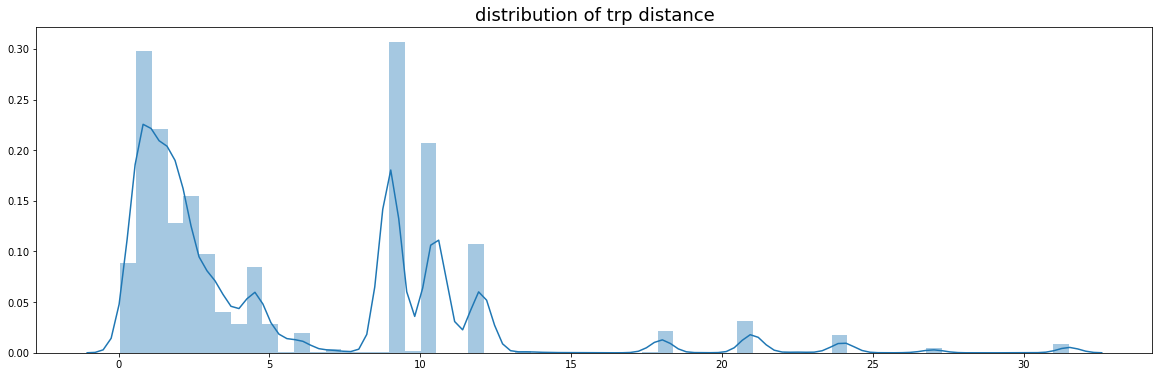

In [6]:
plt.figure(figsize=(20,6))
sns.distplot(data_final['volume_sold'], bins=60)
plt.title("distribution of trp distance", fontsize =18)
#plt.ylabel("fare amount", fontsize =13)
plt.xlabel("",fontsize =15)
plt.show()
#plt.savefig("trip_distance4.pdf")

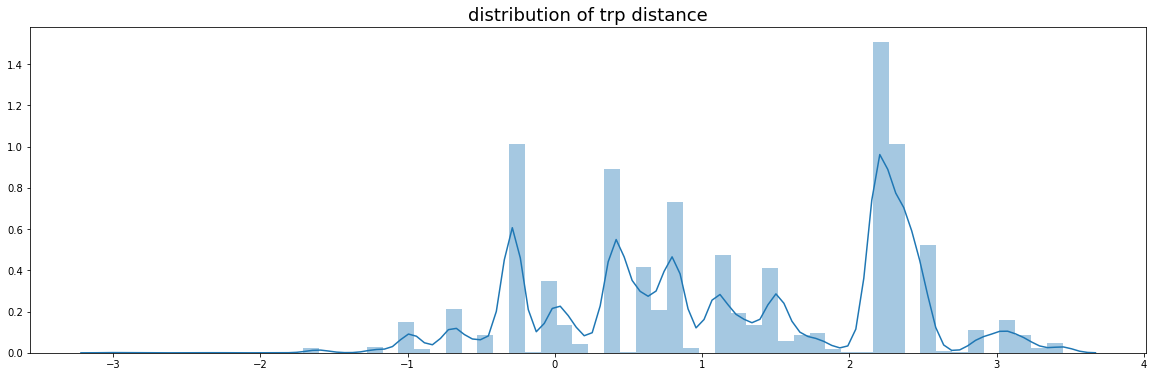

In [7]:
plt.figure(figsize=(20,6))
sns.distplot(data_final['log_volume_sold'], bins=60)
plt.title("distribution of trp distance", fontsize =18)
#plt.ylabel("fare amount", fontsize =13)
plt.xlabel("",fontsize =15)
plt.show()
#plt.savefig("trip_distance4.pdf")

In [ ]:
subs = data_final.sample(n = 100000, replace = False, random_state = 100)
sns.pairplot(subs[["volume_sold","log_volume_sold","store_num",
                   "log_store_num","log_cost_price",
                   "cost_price","retail_price","log_retail_price",
                   "bottle_volume","log_bottle_volume"]])
plt.show()

In [ ]:
data_final[["volume_sold","store_count","cost_price","retail_price","bottle_volume"]].describe()

### Visualisation 

<AxesSubplot:>

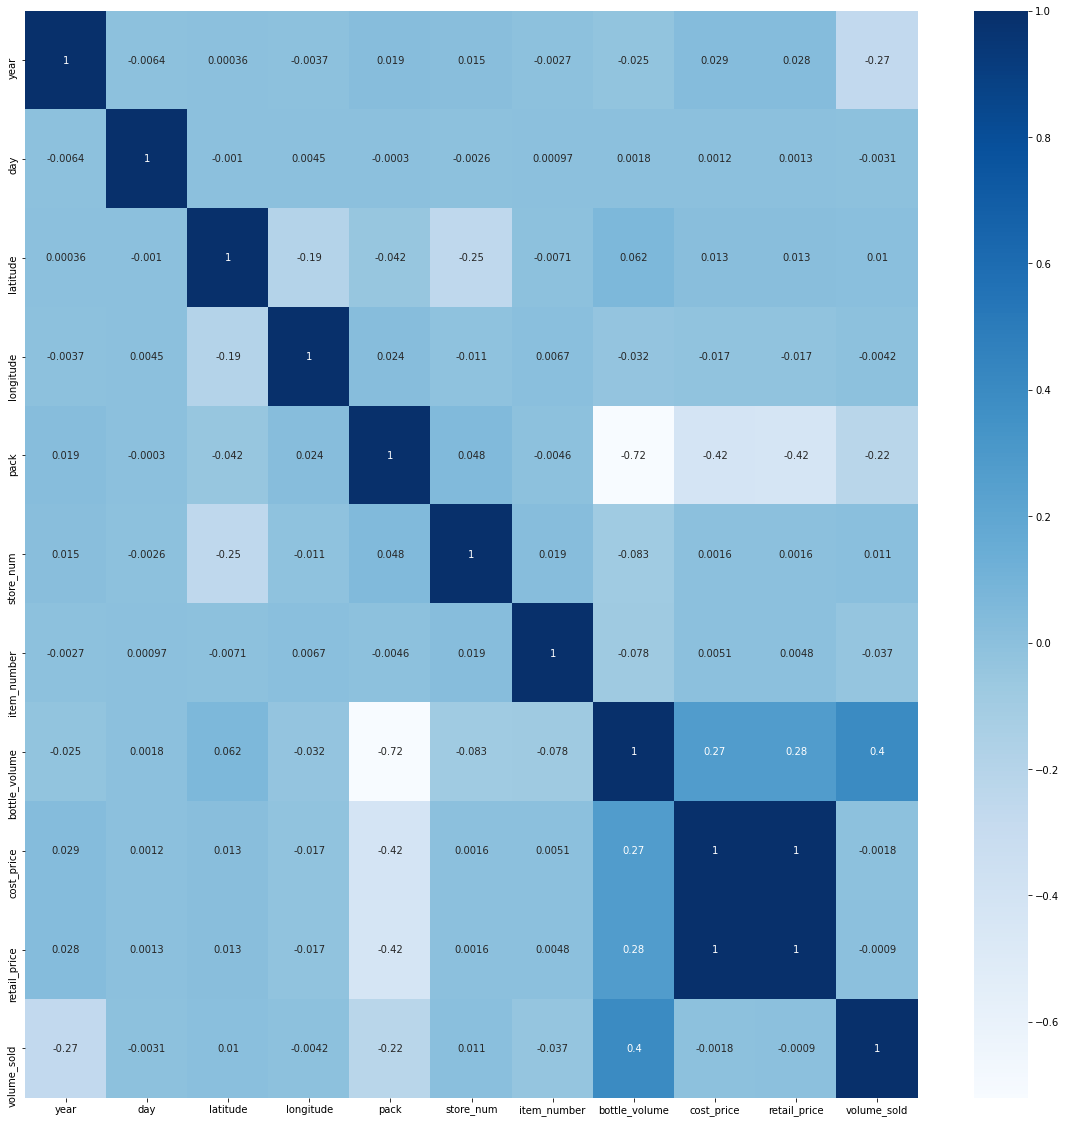

In [38]:
plt.figure(figsize=(20, 20))
cor = data_final.corr(method='pearson')
sns.heatmap(cor,annot = True,cmap= plt.cm.Blues)

#plt.show()
#plt.savefig('heatmap1.pdf')


In [35]:
data_final.dtypes

year                int64
month            category
day                 int64
latitude          float64
longitude         float64
week_of_day      category
pack                int64
city             category
category         category
county_number       int64
store_num           int64
item_number         int64
bottle_volume       int64
cost_price        float64
retail_price      float64
volume_sold       float64
store_number     category
encoded_city     category
dtype: object

In [36]:
data_final.week_of_day = data_final.week_of_day.astype("category")
data_final.encoded_city = data_final.encoded_city.astype("category")
data_final.month = data_final.month.astype("category")
data_final.county_number = data_final.county_number.astype("category")
data_final.store_number = data_final.store_number.astype("category")

In [31]:
from statsmodels.formula.api import *
def compute_corr_categorical(formula, feature_name):
    fit = ols(formula, data = data_final).fit()
    fitted_val = pd.Series(fit.fittedvalues)
    cor = round(fitted_val.corr(data_final.volume_sold, method='pearson'), 4)
    print("Pearson correlation between volume sold and ", feature_name, " is: ", cor)
    return (cor)


In [33]:
month_corr = compute_corr_categorical("volume_sold ~ month", "month")
encoded_city_corr = compute_corr_categorical("volume_sold ~ encoded_city", "encoded_city")
week_day_corr = compute_corr_categorical("volume_sold ~ week_of_day", "week_of_day")
category_corr = compute_corr_categorical("volume_sold ~ category", "category")
store_number_corr = compute_corr_categorical("volume_sold ~ store_number", "store_number")


Pearson correlation between volume sold and  month  is:  0.0539
Pearson correlation between volume sold and  encoded_city  is:  0.177
Pearson correlation between volume sold and  week_of_day  is:  0.062
Pearson correlation between volume sold and  category  is:  0.3768
Pearson correlation between volume sold and  store_number  is:  0.3934


In [37]:
county_corr = compute_corr_categorical("volume_sold ~ county_number", "county_number")

Pearson correlation between volume sold and  county_number  is:  0.1115


###  scatter plot profit vs volume 

### scatter plot sale vs volume 

### boxplot of volume vs weekday 

In [51]:
data_filtered.week_of_day.value_counts()

3    2866501
1    2843824
2    2817689
4    2377952
5     562546
6      91146
Name: week_of_day, dtype: int64

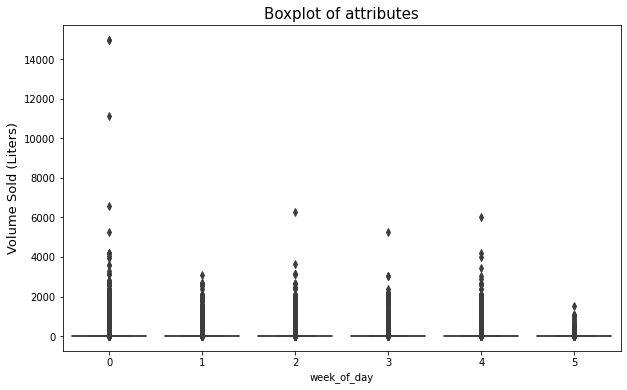

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'week_of_day', y = 'Volume Sold (Liters)', data = data_filtered[["week_of_day","Volume Sold (Liters)"]])
plt.ylabel('Volume Sold (Liters)', fontsize = 13)
plt.title("Boxplot of attributes", fontsize =15)
#plt.savefig("Boxplot of attributes.pdf")
plt.show()

In [73]:
sf = gpd.read_file("county.shp")
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
gdf_PUL = gpd.GeoDataFrame(pd.merge(data_filtered, sf, left_on = 'County', 
                                right_on = 'COUNTY')).drop('County', axis = 1)

geoJSON = gdf_PUL[['geometry','COUNTY']].drop_duplicates('COUNTY').to_json()
pd.set_option('display.max_rows', 103)
data_filtered.County.value_counts()

# Analyze total alcohol sales in different counties (chorolength)
volume_sold_df = data_filtered.loc[:, ["County", "Volume Sold (Liters)"]].groupby("County").sum().reset_index() # 103 counties

profit_df = data_filtered.loc[:, ["County", "Profit"]].groupby("County").sum().reset_index()


td_map = folium.Map(location = [41.8780, -93.0977], 
                    zoom_start= 10,tiles = "cartodbpositron")

cho_map = folium.Choropleth(
    geo_data=geoJSON,
    data=volume_sold_df[['County','Volume Sold (Liters)']],
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    key_on = 'feature.properties.COUNTY',
    line_opacity=0.2,
    legend_name='Volume Sold (Liters)',
    highlight=True,
    line_color='green',
    columns = ['County','Volume Sold (Liters)'], reset = True,
).add_to(td_map)

cho_map.geojson.add_child(folium.features.GeoJsonTooltip(['COUNTY'], labels = False))
folium.LayerControl().add_to(td_map)
td_map.save('foliumChoropleth_map_volume_sold.html')
td_map

In [ ]:
td_map = folium.Map(location = [41.8780, -93.0977], 
                    zoom_start= 10,tiles = "cartodbpositron")

cho_map = folium.Choropleth(
    geo_data=geoJSON,
    data=profit_df[['County','Profit']],
    name='choropleth',
    fill_color='YlGn',
    fill_opacity=0.7,
    key_on = 'feature.properties.COUNTY',
    line_opacity=0.2,
    legend_name='Profit',
    highlight=True,
    line_color='green',
    columns = ['County','Profit'], reset = True,
).add_to(td_map)

cho_map.geojson.add_child(folium.features.GeoJsonTooltip(['COUNTY'], labels = False))
folium.LayerControl().add_to(td_map)
#td_map.save('foliumChoroplethMap_trip_distance.html')
td_map

In [32]:
# data
data_final.to_csv("data_final.csv")
#data_final = pd.read_csv("data_final.csv")
#data_final = data_final.iloc[:, 1:]
#data_final

In [10]:
data_final.week_of_day = data_final.week_of_day.astype("category")
data_final.encoded_city = data_final.encoded_city.astype("category")
data_final.month = data_final.month.astype("category")
data_final.encoded_city = data_final.encoded_city.astype("category")

### Models 

In [4]:
data_final.columns

Index(['year', 'month', 'day', 'latitude', 'longitude', 'week_of_day', 'pack',
       'city', 'category', 'county_number', 'store_num', 'item_number',
       'bottle_volume', 'cost_price', 'retail_price', 'volume_sold',
       'store_number', 'log_volume_sold', 'log_cost_price', 'log_store_num',
       'log_retail_price', 'log_bottle_volume', 'encoded_city'],
      dtype='object')

In [ ]:
# linear regression 

In [12]:
# train-test splitting 
from sklearn.linear_model import Lasso
from statsmodels.formula.api import *
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
X = data_final[['year', 'month', 'day', 'latitude', 'longitude', 'week_of_day', 'pack',
                'category', 'county_number', 'store_num', 'item_number','bottle_volume', 
                'cost_price', 'retail_price', 'volume_sold',
       'store_number','encoded_city']]
y = data_final.log_volume_sold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)
#

In [ ]:
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)
print(lasso.coef_)

### baseline

In [65]:
base_pred = np.mean(y_train)
pred = [base_pred]*len(y_test)
mean_squared_error(y_test, pred, squared=False)#1.1077260437576384

1.1040415459609276

### linear models

In [66]:
training_set = X_train.copy(deep=True)
training_set["log_volume_sold"] = y_train
model_full = ols(formula = "log_volume_sold~latitude+longitude+year+month+day+week_of_day+pack+encoded_city+category+county_number+item_number+bottle_volume+log_cost_price+log_store_num+log_retail_price", data = training_set).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_volume_sold   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     2.495
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           4.11e-19
Time:                        00:10:37   Log-Likelihood:                -913.66
No. Observations:                 800   AIC:                             2335.
Df Residuals:                     546   BIC:                             3525.
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             342.9199    164.512      2.084      0.038      19.767     666.073
week_of_day[T.2]       -0.0742      0.125     -0.594      0.553      -0.320       0.171
week_of_day[T.3]    -3.647e-05      0.130     -0.000      1.000      -0.255       0.255
week_of_day[T.4]        0.0356      0.125      0.286      0.775      -0.209       0.280
week_of_day[T.5]        0.0765      0.205      0.373      0.709      -0.326       0.479
week_of_day[T.6]        0.1640      0.391      0.420      0.675      -0.603       0.931
encoded_city[T.1]   -9.654e-08   4.93e-08     -1.958      0.051   -1.93e-07     2.9e-10
encoded_city[T.2]    1.753e-07   8.86e-08      1.977      0.049    1.15e-09    3.49e-07
encoded_city[T.3]    7.192e-08   3.65e-08      1.971      0.049    2.46e-10    1.44e-07
encoded_city[T.4]       0.8089      5.579      0.145      0.885     -10.150      11.768
encoded_city[T.5]     4.12e-07   2.12e-07      1.947      0.052   -3.74e-09    8.28e-07
encoded_city[T.6]   -2.217e-07   1.12e-07     -1.971      0.049   -4.43e-07   -7.75e-10
encoded_city[T.7]   -1.884e-07    9.5e-08     -1.983      0.048   -3.75e-07   -1.79e-09
encoded_city[T.8]   -2.227e-07   1.11e-07     -2.001      0.046   -4.41e-07   -4.13e-09
encoded_city[T.9]     4.31e-08    2.2e-08      1.962      0.050   -4.84e-11    8.63e-08
encoded_city[T.10]      0.6709      2.267      0.296      0.767      -3.782       5.124
encoded_city[T.11]    2.56e-06   1.27e-06      2.020      0.044    7.01e-08    5.05e-06
encoded_city[T.12]  -2.548e-06   1.26e-06     -2.030      0.043   -5.01e-06   -8.21e-08
encoded_city[T.13]  -2.344e-07    1.2e-07     -1.954      0.051    -4.7e-07     1.2e-09
encoded_city[T.14]   3.269e-07   1.71e-07      1.910      0.057   -9.26e-09    6.63e-07
encoded_city[T.15]     -2.1939      2.308     -0.950      0.342      -6.728       2.340
encoded_city[T.16]  -4.575e-07   2.33e-07     -1.967      0.050   -9.14e-07   -5.62e-10
encoded_city[T.17]   1.748e-07   8.84e-08      1.978      0.048    1.17e-09    3.48e-07
encoded_city[T.18]     -0.5712      1.720     -0.332      0.740      -3.950       2.808
encoded_city[T.19]     -1.0156      3.042     -0.334      0.739      -6.990       4.959
encoded_city[T.20]     -0.6183      3.770     -0.164      0.870      -8.024       6.788
encoded_city[T.21]     -2.2492      2.255     -0.997      0.319      -6.678       2.180
encoded_city[T.22]  -2.164e-07   1.07e-07     -2.017      0.044   -4.27e-07    -5.7e-09
encoded_city[T.23]   1.198e-07   6.02e-08      1.991      0.047    1.63e-09    2.38e-07
encoded_city[T.24]   3.307e-09   1.56e-09      2.121      0.034    2.44e-10    6.37e-09
encoded_city[T.25]     -0.3633      3.758     -0.097      0.923      -7.745       7.019
encoded_city[T.26]     -0.4028      3.870     -0.104      0.917      -8.005       7.199
enc

In [67]:
full_model_pred = model_full.predict(X_test)
mean_squared_error(y_test, full_model_pred, squared=False)#0.8715717918332925

1.1678805236430956

### decision tree

0.8574618382463729


[Text(167.4, 195.696, 'log_bottle_volume <= 6.829\nmse = 1.228\nsamples = 800000\nvalue = 1.186'),
 Text(83.7, 152.208, 'log_bottle_volume <= 6.511\nmse = 1.121\nsamples = 523858\nvalue = 0.872'),
 Text(41.85, 108.72, 'pack <= 13.5\nmse = 1.134\nsamples = 145191\nvalue = 0.314'),
 Text(20.925, 65.232, 'bottle_volume <= 337.5\nmse = 0.76\nsamples = 69568\nvalue = -0.021'),
 Text(10.4625, 21.744, 'mse = 0.875\nsamples = 6401\nvalue = -0.588'),
 Text(31.387500000000003, 21.744, 'mse = 0.712\nsamples = 63167\nvalue = 0.036'),
 Text(62.775000000000006, 65.232, 'year <= 2016.5\nmse = 1.28\nsamples = 75623\nvalue = 0.623'),
 Text(52.3125, 21.744, 'mse = 1.222\nsamples = 63043\nvalue = 0.789'),
 Text(73.2375, 21.744, 'mse = 0.74\nsamples = 12580\nvalue = -0.209'),
 Text(125.55000000000001, 108.72, 'year <= 2016.5\nmse = 0.951\nsamples = 378667\nvalue = 1.086'),
 Text(104.625, 65.232, 'year <= 2015.5\nmse = 0.902\nsamples = 323301\nvalue = 1.234'),
 Text(94.16250000000001, 21.744, 'mse = 0.849\

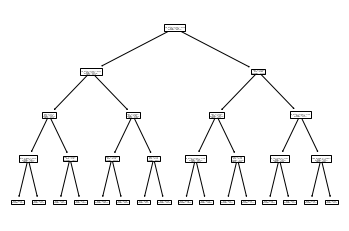

In [10]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=4, random_state= 23456)
reg.fit(X_train, y_train)
reg_model_pred = reg.predict(X_test)
print(mean_squared_error(y_test, reg_model_pred, squared=False))
tree.plot_tree(reg,feature_names= X_train.columns)
# 1000 sample = 0.9000124584308853

# without tuning RMSE = 0.8574618382463729

In [13]:
# Cursory search for number of estimators hyperparameter
n_estimators_score = []
for i in range(3,60):
    cv_results = cross_validate(tree.DecisionTreeRegressor(max_depth= i), 
                                X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 3)
    n_estimators_score.append(-sum(cv_results['test_score']) / len(cv_results['test_score']))
fig, ax = plt.subplots(figsize = (8,8))
plt.plot(range(3,60), n_estimators_score)
plt.title(f'Regularization versus RMSE score')
plt.xlabel('Maximum Depth')
plt.ylabel('Test Score')
#plt.show()
fig.savefig('Regularization-max depth.pdf')
plt.close()

In [14]:
# Cursory search for number of estimators hyperparameter
n_estimators_score = []
for i in np.linspace(0.1, 1, 100):
    cv_results = cross_validate(tree.DecisionTreeRegressor(max_features= i), 
                                X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 3)
    n_estimators_score.append(-sum(cv_results['test_score']) / len(cv_results['test_score']))
fig, ax = plt.subplots(figsize = (8,8))
plt.plot(np.linspace(0.01, 1, 100), n_estimators_score)
plt.title(f'Regularization versus RMSE score')
plt.xlabel('maximum features')
plt.ylabel('Test Score')
#plt.show()
fig.savefig('Regularization-max features.')
plt.close()

In [ ]:
# decision tree regressor tuning 
def lr_func(max_depth,max_features):
    cv_results = cross_validate(tree.DecisionTreeRegressor(max_depth = int(max_depth), 
                                                           max_features = max_features,random_state= 23456),
                                X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 3)
    return sum(cv_results['test_score']) / len(cv_results['test_score'])


# Find the global maximum of the target function 
lr_params = BayesianOptimization(lr_func, {'max_depth': (15,20), 'max_features': (0.8, 1)}, random_state = 42)
lr_params.maximize(n_iter = 10, init_points = 2)
final_para_rf = lr_params.max
lr_params.max

lr_model = tree.DecisionTreeRegressor(max_depth= final_para_rf['params']['max_depth'],
                                      max_features = final_para_rf['params']['max_features'],random_state= 23456)
lr_model.fit(X_train, y_train)

pred = lr_model.predict(X_test)
mean_squared_error(y_test, pred, squared=False)#0.8960627683486168


|   iter    |  target   | max_depth | max_fe... |
-------------------------------------------------
|  1        | -0.7009   |  16.87    |  0.9901   |
|  2        | -0.7003   |  18.66    |  0.9197   |


### random forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators, max_depth=5, random_state=0)
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_test)
mean_squared_error(y_test, rf_model_pred, squared=False)#0.8263070406124846


### Ensembling 

In [30]:
#!pip3 install bayesian-optimization

  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/2b/a8/f4c66eb529bb252d50e83dbf2909c6502e2f857550f22571ed8556f62d95/scipy-1.5.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5c/a1/273def87037a7fb010512bbc5901c31cfddfca8080bc63b42b26e3cc55b3/scikit_learn-0.23.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
    100% |████████████████████████████████| 307kB 2.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for bayesian-optimization ... done
  Stored in directory: /home/student.unimelb.edu.au/xinyij4/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [35]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_validate
from sklearn import tree

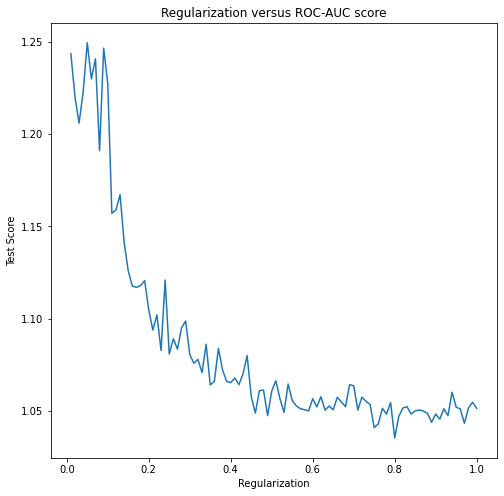

In [111]:
# Cursory search for number of estimators hyperparameter
n_estimators_score = []
for i in np.linspace(0.01, 1, 100):
    cv_results = cross_validate(tree.DecisionTreeRegressor(max_features= i), 
                                X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5)
    n_estimators_score.append(-sum(cv_results['test_score']) / len(cv_results['test_score']))
fig, ax = plt.subplots(figsize = (8,8))
plt.plot(np.linspace(0.01, 1, 100), n_estimators_score)
plt.title(f'Regularization versus ROC-AUC score')
plt.xlabel('Regularization')
plt.ylabel('Test Score')
#plt.show()
fig.savefig('Regularization versus RMSE score max features.')
plt.close()

In [109]:
# decision tree regressor tuning 
def lr_func(max_depth,max_features):
    cv_results = cross_validate(tree.DecisionTreeRegressor(max_depth = int(max_depth), max_features = max_features,random_state= 23456),
                                X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5)
    return sum(cv_results['test_score']) / len(cv_results['test_score'])


# Find the global maximum of the target function 
lr_params = BayesianOptimization(lr_func, {'max_depth': (3,10), 'max_features': (0.2, 0.6)}, random_state = 42)
lr_params.maximize(n_iter = 40, init_points = 2)
final_para_rf = lr_params.max
lr_params.max

lr_model = tree.DecisionTreeRegressor(max_depth= final_para_rf['params']['max_depth'],
                                      max_features = final_para_rf['params']['max_features'],random_state= 23456)
lr_model.fit(X_train, y_train)

pred = lr_model.predict(X_test)
mean_squared_error(y_test, pred, squared=False)#0.8960627683486168


|   iter    |  target   | max_depth | max_fe... |
-------------------------------------------------
|  1        | -0.8572   |  5.622    |  0.5803   |
|  2        | -0.8584   |  8.124    |  0.4395   |
|  3        | -0.8572   |  5.695    |  0.5772   |
|  4        | -1.035    |  3.0      |  0.2      |
|  5        | -0.9051   |  10.0     |  0.2      |
|  6        | -0.9028   |  7.073    |  0.2      |
|  7        | -0.8237   |  8.972    |  0.5942   |
|  8        | -0.9067   |  8.835    |  0.2      |
|  9        | -0.8237   |  9.417    |  0.6      |
|  10       | -0.9588   |  4.694    |  0.2      |
|  11       | -0.8212   |  7.609    |  0.6      |
|  12       | -0.8214   |  6.528    |  0.6      |
|  13       | -0.931    |  6.228    |  0.2      |
|  14       | -0.9028   |  7.716    |  0.2      |
|  15       | -0.8214   |  6.918    |  0.6      |
|  16       | -0.8177   |  8.523    |  0.6      |
|  17       | -0.8212   |  7.291    |  0.6      |
|  18       | -0.8365   |  10.0     |  0.6      |


{'target': -0.81771267907918,
 'params': {'max_depth': 8.522718347446364, 'max_features': 0.6}}

0.8120887472776469

In [ ]:
!pip3 install lightgbm